## Reproject CRS and resolution

In [ ]:
import cecil
import xarray

True

First, set up the Cecil client.

In [2]:
client = cecil.Client()

Load the dataset of interest.

In [3]:
data_request_id = '3211d80e-d578-4a5e-b083-4c78cbb79fc5'

# Load the xarray dataset for the specified data request
ds = client.load_xarray(data_request_id)
ds

<xarray.Dataset> Size: 7MB
Dimensions:                      (x: 121, y: 102, time: 8)
Coordinates:
  * x                            (x) float64 968B 132.5 132.5 ... 132.5 132.5
  * y                            (y) float64 816B -12.72 -12.72 ... -12.73
    spatial_ref                  int64 8B 0
  * time                         (time) datetime64[ns] 64B 2017-07-01 ... 202...
Data variables:
    canopy_cover                 (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    canopy_height                (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    forest_cover                 (time, y, x) float32 395kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    living_aboveground_biomass   (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    living_belowground_biomass   (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    living_biomass_co2_eq        (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    living_biomass_carbon_stock  (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    living_biomass               (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
    tree_height                  (time, y, x) float64 790kB dask.array<chunksize=(1, 102, 121), meta=np.ndarray>
Attributes:
    provider_name:    kanop
    dataset_id:       4928812e-86b7-4339-8db9-f6bf8a82ff57
    dataset_name:     Monitoring 10 m
    dataset_crs:      EPSG:4326
    aoi_id:           7f02f146-572e-4ed6-98f2-fa9d03e8008b
    data_request_id:  3211d80e-d578-4a5e-b083-4c78cbb79fc5

The rioxarray [reproject](https://corteva.github.io/rioxarray/stable/examples/reproject.html) function gives the option to change the CRS of a dataset, the resolution, and the resampling method. See the rioxarray documentation for further parameters. 

Note that the resolution should be provided in the units of the destination CRS (either degrees or meters), and the ideal resampling method likely varies depending on the variable within the dataset. 

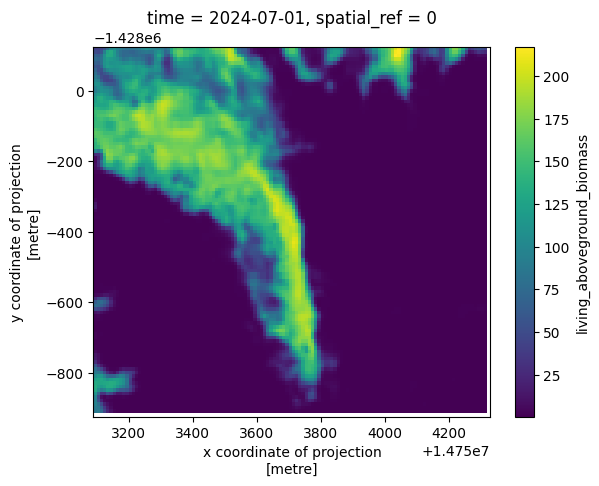

In [4]:
from rasterio.enums import Resampling

# Apply a single resampling method to all variables in the dataset. 
reprojected_ds = ds.rio.reproject(dst_crs='EPSG:3857', resolution=10, resampling=Resampling.nearest)

# Plot the result.
reprojected_ds['living_aboveground_biomass'].sel(time='2024').plot()

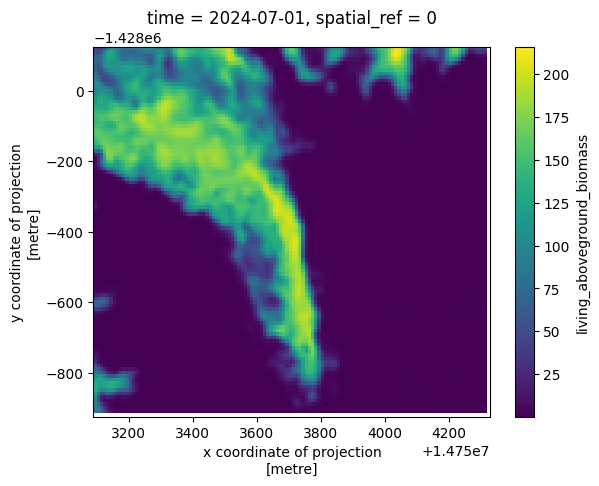

In [5]:
# Select a single variable to apply bilinear resampling to.
agb = ds['living_aboveground_biomass']

# Apply bilinear resampling to the selected variable.
reprojected_agb = agb.rio.reproject(dst_crs='EPSG:3857', resolution=10, resampling=Resampling.bilinear)

# Plot the result.
reprojected_agb.sel(time='2024').plot()